In [1]:
import arch
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import fredapi as fn
import statsmodels as sm

# Package used:  arch-py + statsmodels.tsa

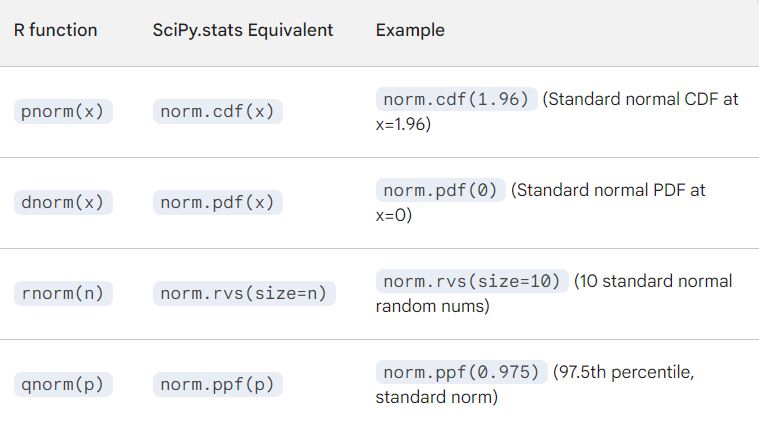
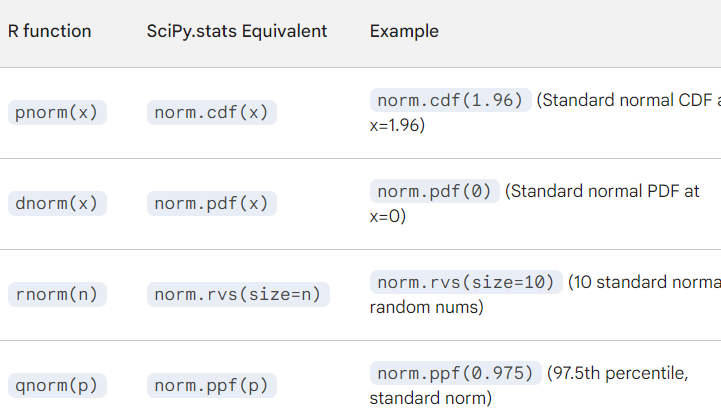

<Axes: >

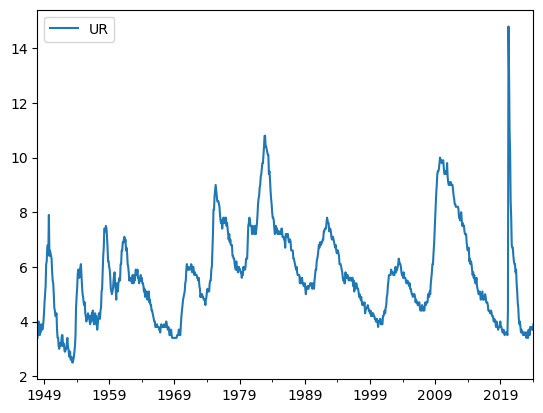

In [2]:
# Get Data
import arch.data.default
API_KEY = "c33d17d6ad546cfc58302d8906a42ece"
fred = fn.Fred(API_KEY)
UR = pd.DataFrame(fred.get_series('UNRATE'))
UR.columns = ["UR"]
UR.plot()

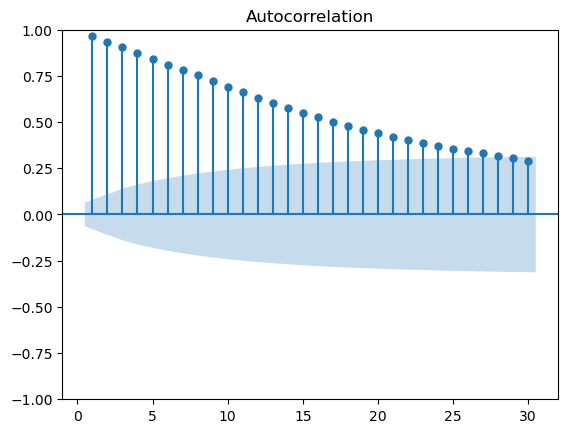

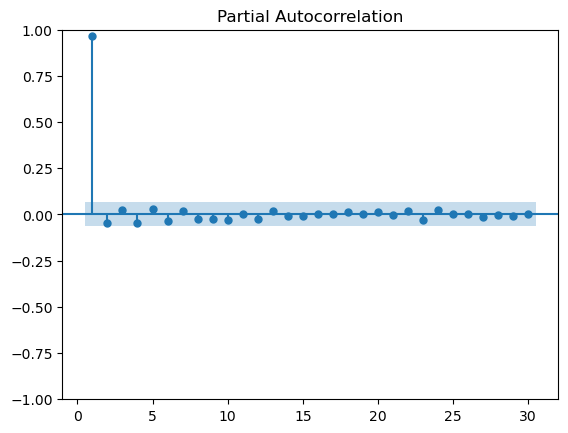

In [3]:
# Graphs of autocorrelations
import statsmodels.graphics.tsaplots as smgt
a1 = smgt.plot_acf(UR, zero=False)
a2 = smgt.plot_pacf(UR, zero=False)

In [4]:
# ADF test as seen in class
def ADF_test(timeseries, IC="bic", significance=0.01):
    """
    Performs Augmented Dickey-Fuller (ADF) test with additional outputs.

    Args:
        timeseries (array-like): The time series data to be tested.
        IC (str): Information criterion to use for selecting the lag order. ["bic","aic"]
        significance (float): Significance level for hypothesis testing.

    Returns:
        Analysis of unit root type

    """
    import warnings
    warnings.simplefilter('ignore', category=UserWarning)
    from arch.unitroot import ADF
    import statsmodels.tsa.arima.model as smt

    # Step 1: Perform ADF test with constant and trend
    print("Step 1: Performing ADF test with constant and trend...")
    adf = ADF(timeseries, trend="ct", method=IC)
    print("Results of Dickey-Fuller Test:")
    print(f"       p-value of the test: {adf.pvalue}.")
    if adf.pvalue < significance:
        print(
            "       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]")
    else:
        print("       We do not reject the null hypothesis -> Proceeding to step 2...")
        # Step 2: Test for the significance of the trend given no unit root
        print("Step 2: Testing for the significance of the trend given no unit root...")
        model_2 = smt.ARIMA(endog=timeseries.diff(),
                            order=(adf.lags, 0, 0), trend="ct").fit(cov_type="robust")
        p_value_trend = model_2.pvalues["x1"]
        print("Results of the contrast:")
        print(f"       p-value of the contrast: {p_value_trend}")
        if p_value_trend < significance:
            print(
                "       Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and t][Trend Stationary: y_t=alpha+beta*t+y_{t-1}+epsilon_t]")
            print(adf.regression.summary())
            print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
        else:
            print(
                "       We do not reject the null hypothesis -> Proceeding to step 3...")
            # Step 3: Perform ADF test with only a constant
            print("Step 3: Performing ADF test with only a constant...")
            print("Results of Dickey-Fuller Test:")
            adf = ADF(timeseries, method=IC, trend="c")
            print(f"       p-value of the test: {adf.pvalue}.")
            if adf.pvalue < significance:
                print(
                    "       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]")
            else:
                print(
                    "       Can't reject the null hypothesis -> Proceeding to step 4...")
                # Step 4: Test for the significance of the constant given no unit root and no trend
                print(
                    "Step 4: Testing for the significance of the constant given no unit root and no trend...")
                model_3 = smt.ARIMA(endog=timeseries.diff(),
                                    order=(adf.lags, 0, 0), trend="c").fit(cov_type="robust")
                p_value_const = model_3.pvalues["const"]
                print("Results of the contrast:")
                print(f"       p-value of the contrast: {p_value_const}")
                if p_value_const < significance:
                    print(
                        "         Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and no t][White Noise with Drift: y_t= alpha + y_{t-1} + epsilon_t]")
                    print(adf.regression.summary())
                    print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
                else:
                    print(
                        "       We do not reject the null hypothesis -> Proceeding to step 5...")
                    # Step 5: Perform ADF test with no constant and no trend
                    print(
                        "Step 5: Performing ADF test with no constant and no trend...")
                    adf = ADF(timeseries, method=IC, trend="n")
                    print("Results of Dickey-Fuller Test:")
                    print(f"       p-value of the test: {adf.pvalue}.")
                    if adf.pvalue < significance:
                        print(
                            "       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]")
                    else:
                        print(
                            "       Conclusion: We do not reject the null hypothesis ->[The model has a unit root with no constant or trend]=[Pure White Noise: y_t= y_{t-1} + epsilon_t].")


def ADF_test_extensive_version(timeseries, IC="bic", significance=0.01):
    """
    Performs Augmented Dickey-Fuller (ADF) test with additional outputs.

    Args:
        timeseries (array-like): The time series data to be tested.
        IC (str): Information criterion to use for selecting the lag order. ["bic","aic"]
        significance (float): Significance level for hypothesis testing.

    Returns:
        Analysis of unit root type

    """
    import warnings
    warnings.simplefilter('ignore', category=UserWarning)
    from arch.unitroot import ADF
    import statsmodels.tsa.arima.model as smt
    print(f"\n\nVariable: {list(timeseries.columns)} ")
    # Step 1: Perform ADF test with constant and trend
    print("Step 1: Performing ADF test with constant and trend...")
    adf = ADF(timeseries, trend="ct", method=IC)
    print("Results of Dickey-Fuller Test:")
    print(f"       p-value of the test: {adf.pvalue}.")
    if adf.pvalue < significance:
        print(
            "       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]")
        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
        p_value_trend = model_0.pvalues["drift"]
        model_1 = smt.ARIMA(endog=timeseries.diff().dropna(),
                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ctt").fit(cov_type="robust")
        p_value_trend_sq = model_1.pvalues["trend.2"]
        print("              p-value linear trend component (WN model):", p_value_trend)
        print("              p-value linear cuadratic trend component (WN model):", p_value_trend_sq)

        if p_value_trend or p_value_trend_sq < significance:
            print(
                "          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]")
        else:
            print(
                "          Conclusion: No evidence of the series having any unit root or trend component -> [The series is stationary]")

    else:
        print("       We do not reject the null hypothesis -> Proceeding to step 2...")
        # Step 2: Test for the significance of the trend given no unit root
        print("Step 2: Testing for the significance of the trend given unit root...")
        model_2 = smt.ARIMA(endog=timeseries.diff(),
                            order=(adf.lags, 0, 0), trend="ct").fit(cov_type="robust")
        p_value_trend = model_2.pvalues["x1"]
        print("Results of the contrast:")
        print(f"       p-value of the contrast: {p_value_trend}")
        if p_value_trend < significance:
            print(
                "       Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and t][Trend Stationary: y_t=alpha+beta*t+y_{t-1}+epsilon_t]")
            print(adf.regression.summary())
            print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
        else:
            print(
                "       We do not reject the null hypothesis -> Proceeding to step 3...")
            # Step 3: Perform ADF test with only a constant
            print("Step 3: Performing ADF test with only a constant...")
            print("Results of Dickey-Fuller Test:")
            adf = ADF(timeseries, method=IC, trend="c")
            print(f"       p-value of the test: {adf.pvalue}.")
            if adf.pvalue < significance:
                print(
                    "       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]")
                model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                    order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                    order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                p_value_trend = model_0.pvalues["drift"]
                model_1 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                    order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ctt").fit(cov_type="robust")
                p_value_trend_sq = model_1.pvalues["trend.2"]
                print(
                    "              p-value linear trend component (WN model):", p_value_trend)
                print(
                    "              p-value linear cuadratic trend component (WN model):", p_value_trend_sq)

                if p_value_trend or p_value_trend_sq < significance:
                    print(
                        "          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]")
                else:
                    print(
                        "          Conclusion: No evidence of the series having any unit root or trend component -> [The series is stationary]")

            else:
                print(
                    "       Can't reject the null hypothesis -> Proceeding to step 4...")
                # Step 4: Test for the significance of the constant given no unit root and no trend
                print(
                    "Step 4: Testing for the significance of the constant given unit root and no trend...")
                model_3 = smt.ARIMA(endog=timeseries.diff(),
                                    order=(adf.lags, 0, 0), trend="c").fit(cov_type="robust")
                p_value_const = model_3.pvalues["const"]
                print("Results of the contrast:")
                print(f"       p-value of the contrast: {p_value_const}")
                if p_value_const < significance:
                    print(
                        "         Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and no t][White Noise with Drift: y_t= alpha + y_{t-1} + epsilon_t]")
                    print(adf.regression.summary())
                    print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
                else:
                    print(
                        "       We do not reject the null hypothesis -> Proceeding to step 5...")
                    # Step 5: Perform ADF test with no constant and no trend
                    print(
                        "Step 5: Performing ADF test with no constant and no trend...")
                    adf = ADF(timeseries, method=IC, trend="n")
                    print("Results of Dickey-Fuller Test:")
                    print(f"       p-value of the test: {adf.pvalue}.")
                    if adf.pvalue < significance:
                        print(
                            "       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]")
                        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                        p_value_trend = model_0.pvalues["drift"]
                        model_1 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ctt").fit(cov_type="robust")
                        p_value_trend_sq = model_1.pvalues["trend.2"]
                        print(
                            "              p-value linear trend component (WN model):", p_value_trend)
                        print(
                            "              p-value linear cuadratic trend component (WN model):", p_value_trend_sq)

                        if p_value_trend or p_value_trend_sq < significance:
                            print(
                                "          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]")
                        else:
                            print(
                                "          Conclusion: No evidence of the series having any unit root or trend component -> [The series is stationary]")
                    else:
                        print(
                            "       Conclusion: We do not reject the null hypothesis ->[The model has a unit root with no constant or trend]=[Pure White Noise: y_t= y_{t-1} + epsilon_t].")


ADF_test(UR, significance=0.001)

Step 1: Performing ADF test with constant and trend...
Results of Dickey-Fuller Test:
       p-value of the test: 0.020221874857185258.
       We do not reject the null hypothesis -> Proceeding to step 2...
Step 2: Testing for the significance of the trend given no unit root...
Results of the contrast:
       p-value of the contrast: 0.661473064374658
       We do not reject the null hypothesis -> Proceeding to step 3...
Step 3: Performing ADF test with only a constant...
Results of Dickey-Fuller Test:
       p-value of the test: 0.003150791837747478.
       Can't reject the null hypothesis -> Proceeding to step 4...
Step 4: Testing for the significance of the constant given no unit root and no trend...
Results of the contrast:
       p-value of the contrast: 0.9687926752985859
       We do not reject the null hypothesis -> Proceeding to step 5...
Step 5: Performing ADF test with no constant and no trend...
Results of Dickey-Fuller Test:
       p-value of the test: 0.27241117424808514.

In [5]:
# Other nice stuff with regards to ADF...
from arch.unitroot import ADF
adf = ADF(UR, trend="ct", method="bic")
print(adf.summary())
print(adf.regression.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.734
P-value                         0.020
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.130
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           0.000846
Time:                        04:16:14   Log-Likelihood:                -494.42
No. Observations:                 913   AIC:                             994.8
Df Residuals:                     910   BIC:            

In [6]:
# DF-GLS test. Just DO it if you expect Unit Root and you did not get it with the other tests...
# Basically, "improved" version of ADF (uses GLS detrending), with no additional deterministic trend
def DFGLS_test(timeseries, IC="bic", significance=0.01):
    """
    Performs Augmented Dickey-Fuller (ADF) test with additional outputs.

    Args:
        timeseries (array-like): The time series data to be tested.
        IC (str): Information criterion to use for selecting the lag order. ["bic","aic"]
        significance (float): Significance level for hypothesis testing.

    Returns:
        Analysis of unit root type

    """

    from arch.unitroot import DFGLS
    import statsmodels.tsa.arima.model as smt

    # Step 1: Perform DF-GLS test with constant and trend
    print("Step 1: Performing DF-GLS test with constant and trend (Note: The only difference with regards to the ADF_test)...")
    adf = DFGLS(timeseries, trend="ct", method=IC)
    print("Results of Dickey-Fuller Test:")
    print(f"       p-value of the test: {adf.pvalue}.")
    if adf.pvalue < significance:
        print(
            "       Conclusion: We reject the null hypothesis -> [The series is stationary.]")
    else:
        print("       We do not reject the null hypothesis -> Proceeding to step 2...")
        # Step 2: Test for the significance of the trend given no unit root
        print("Step 2: Testing for the significance of the trend given no unit root...")
        model_2 = smt.ARIMA(endog=timeseries.diff(),
                            order=(adf.lags, 0, 0), trend="ct").fit(cov_type="robust")
        p_value_trend = model_2.pvalues["x1"]
        print("Results of the contrast:")
        print(f"       p-value of the contrast: {p_value_trend}")
        if p_value_trend < significance:
            print(
                "       Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and t]")
            print(adf.regression.summary())
            print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
        else:
            print(
                "       We do not reject the null hypothesis -> Proceeding to step 3...")
            # Step 3: Perform ADF test with only a constant
            print("Step 3: Performing ADF test with only a constant (Note: This is equivalent to DF-GLS with only a constant)...")
            print("Results of Dickey-Fuller Test:")
            adf = ADF(timeseries, method=IC, trend="c")
            print(f"       p-value of the test: {adf.pvalue}.")
            if adf.pvalue < significance:
                print(
                    "       Conclusion: We reject the null hypothesis -> [The series is stationary.]")
            else:
                print(
                    "       Can't reject the null hypothesis -> Proceeding to step 4...")
                # Step 4: Test for the significance of the constant given no unit root and no trend
                print(
                    "Step 4: Testing for the significance of the constant given no unit root and no trend...")
                model_3 = smt.ARIMA(endog=timeseries.diff(),
                                    order=(adf.lags, 0, 0), trend="c").fit(cov_type="robust")
                p_value_const = model_3.pvalues["const"]
                print("Results of the contrast:")
                print(f"       p-value of the contrast: {p_value_const}")
                if p_value_const < significance:
                    print(
                        "         Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and no t]")
                    print(adf.regression.summary())
                    print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
                else:
                    print(
                        "       We do not reject the null hypothesis -> Proceeding to step 5...")
                    # Step 5: Perform ADF test with no constant and no trend
                    print(
                        "Step 5: Performing ADF test with no constant and no trend...")
                    adf = ADF(timeseries, method=IC, trend="n")
                    print("Results of Dickey-Fuller Test:")
                    print(f"       p-value of the test: {adf.pvalue}.")
                    if adf.pvalue < significance:
                        print(
                            "       Conclusion: We reject the null hypothesis -> [The series is stationary.]")
                    else:
                        print(
                            "       Conclusion: We do not reject the null hypothesis -> [The model has a unit root with no constant or trend].")
    print("\nImportant Note 1: This test has more power to detect a Unit Root than ADF when a series has a very close Unit Root, so only be based on this if you do suspect there is strong evidence for Unit Root and trend. ")

    print(
        "\nImportant Note 2: Not sure if step 2 is correct. Perhaps if you do not reject H0 of step 1 you might just conclude -> [Model: Unit Root with c and t]. The rest of the steps should be ok (and I beleive also the step 2)... ")


DFGLS_test(UR, significance=0.001)

Step 1: Performing DF-GLS test with constant and trend (Note: The only difference with regards to the ADF_test)...
Results of Dickey-Fuller Test:
       p-value of the test: 0.02002647525459985.
       We do not reject the null hypothesis -> Proceeding to step 2...
Step 2: Testing for the significance of the trend given no unit root...
Results of the contrast:
       p-value of the contrast: 0.661473064374658
       We do not reject the null hypothesis -> Proceeding to step 3...
Step 3: Performing ADF test with only a constant (Note: This is equivalent to DF-GLS with only a constant)...
Results of Dickey-Fuller Test:
       p-value of the test: 0.003150791837747478.
       Can't reject the null hypothesis -> Proceeding to step 4...
Step 4: Testing for the significance of the constant given no unit root and no trend...
Results of the contrast:
       p-value of the contrast: 0.9687926752985859
       We do not reject the null hypothesis -> Proceeding to step 5...
Step 5: Performing ADF 

In [7]:
# Other nice stuff with regards to DF-GLS...
from arch.unitroot import DFGLS
dfgls = DFGLS(UR, trend="ct", method="bic")
print(dfgls.summary())
print(dfgls.regression.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -3.193
P-value                         0.020
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.43 (1%), -2.87 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              10.20
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                     0.00146
Time:                        04:16:21   Log-Likelihood:                         -496.47
No. Observations:                 913   AIC:                                     

In [10]:
# This is also ADF like test, but basically take into account 1 possible break in the H0: There unit root and 1 structural break
from arch.unitroot import auto_bandwidth, ZivotAndrews
ZivotAndrews(UR, method="aic", trend="ct")

Test Statistic,-4.773
P-value,0.115
Lags,1


### Missing: Perron test with breaks (seems not implemented here in python). Kind of important if we suspect strucutral pulse/level shifts in a particular series we suspect...

Here appears to exist though a Range Unit Root test ("Aparicio, F., Escribano A., Sipols, A.E. (2006). Range Unit-Root (RUR) tests: robust against nonlinearities, error distributions, structural breaks and outliers. Journal of Time Series Analysis, 27 (4): 545-576")

In [22]:
from statsmodels.tsa.stattools import range_unit_root_test
m = ["RUR_statistic","p-value","Critical Values"]
val=range_unit_root_test(UR, store=True)
pd.DataFrame(zip(m,val))


,0,1
0,RUR_statistic,0.992312
1,p-value,0.01
2,Critical Values,"{'10%': 1.4297904, '5%': 1.2940528, '2.5%': 1...."
